In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.select import Select
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import re
import pandas as pd
from datetime import date,datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date,datetime,timedelta
import time
from dbase import Database

In [42]:
def divide_chunks(l, n):
    for i in range(0, len(l), n): 
        yield l[i:i + n]


url = "https://www.marketwatch.com/investing/future/brn00?countrycode=uk"


chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--incognito')
chrome_options.add_argument( "user-agent=Mozilla/5.0 (X11; Ubuntu; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2919.83 Safari/537.36")

driver = webdriver.Chrome(options = chrome_options)
driver.get(url)

html_content = driver.page_source

soup = BeautifulSoup(html_content, "html.parser")

brent_price_open = [item.text for item in soup.find_all('div', attrs={"class": "element element--table overflow--table FuturesContracts"})[0].find_all('td',attrs = {"class":"table__cell"})]

prices = list(divide_chunks(brent_price_open,7))
print(prices)

brent_name = [item[0] for item in prices]
brent_last = [item[1] for item in prices]
brent_chg = [item[2] for item in prices]
brent_open = [item[3] for item in prices]
brent_high = [item[4] for item in prices]
brent_low = [item[5] for item in prices]
brent_time = datetime.now()


brent_future = {"Names":brent_name,
                "Price_last":brent_last,
                "Price_chg":brent_chg,
                "Price_open":brent_open,
                "Price_high":brent_high,
                "Price_low":brent_low,
                "Time":brent_time}

[['Brent Crude Aug 2022', '$115.81', '-0.48', '$115.02', '$116.00', '$112.45', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Oil (IFEU $/bbl) Front Month', '$115.81', '-0.48', '$115.02', '$116.00', '$112.45', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Sep 2022', '$113.24', '-0.32', '$112.12', '$113.41', '$110.05', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Oct 2022', '$110.89', '-0.14', '$109.76', '$110.96', '$107.78', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Nov 2022', '$108.77', '-0.05', '$108.00', '$108.80', '$105.78', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Dec 2022', '$106.88', '0.07', '$106.25', '$106.94', '$104.00', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Jan 2023', '$105.11', '0.19', '$104.11', '$105.11', '$102.36', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Feb 2023', '$103.41', '0.24', '$102.46', '$103.41', '$100.78', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Mar 2023', '$101.90', '0.30', '$100.99', '$101.90', '$99.33', 'Jun 2, 2022 1:46 p.m.'], ['Brent Crude Apr 2023', '$100.27', '0.10', '$99

# Data Correlation Check 

In [65]:
import sqlite3
db = Database('emtia_db.db')
conn = sqlite3.connect('emtia_db.db') 
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM brent_petrol
                               ''', conn)

sql_query_ttf = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM ttf_gas
                               ''', conn)

sql_query_api2 = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM api2_data
                               ''', conn)

df_brent = pd.DataFrame(sql_query, columns = ['id', 'name', 'price_last','price_chg','price_open','price_high','price_low','price_date','source']) 
df_ttf = pd.DataFrame(sql_query_ttf, columns = ['id', 'name', 'price_last','price_chg','price_open','price_high','price_low','price_date','source']) 
df_api2 = pd.DataFrame(sql_query_api2, columns = ['id', 'name', 'price_last','price_chg','price_open','price_high','price_low','price_date','source']) 

In [66]:
df_brent_barchart = df_brent[df_brent["source"].str.contains("barchart")]
df_brent_barchart_aug = df_brent_barchart[df_brent_barchart["name"].str.contains("Sep '22")]
df_brent_barchart_aug["price_date"]=pd.to_datetime(df_brent_barchart_aug["price_date"])
df_brent_barchart_aug["price_date"] = df_brent_barchart_aug["price_date"].dt.strftime('%Y-%m-%d %H:%M')
df_brent_barchart_aug.index = df_brent_barchart_aug["price_date"]
df_brent_barchart_aug.sort_index(inplace=True, ascending=True)
df_brent_barchart_aug = df_brent_barchart_aug.drop(["id","price_date"],axis=1)
df_brent_barchart_aug.tail()

C:\Users\cihat.sari\AppData\Local\Temp\ipykernel_10948\3956015081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brent_barchart_aug["price_date"]=pd.to_datetime(df_brent_barchart_aug["price_date"])
C:\Users\cihat.sari\AppData\Local\Temp\ipykernel_10948\3956015081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brent_barchart_aug["price_date"] = df_brent_barchart_aug["price_date"].dt.strftime('%Y-%m-%d %H:%M')


,name,price_last,price_chg,price_open,price_high,price_low,source
price_date,,,,,,,
2022-07-07 14:58,Crude Oil Brent F Sep '22,101.66,0.97,99.96,101.82,98.47,https://www.barchart.com/futures/quotes/QAU22/...
2022-07-07 15:04,Crude Oil Brent F Sep '22,101.58,0.89,99.96,101.82,98.47,https://www.barchart.com/futures/quotes/QAU22/...
2022-07-07 15:09,Crude Oil Brent F Sep '22,101.77,1.08,99.96,101.85,98.47,https://www.barchart.com/futures/quotes/QAU22/...
2022-07-07 15:14,Crude Oil Brent F Sep '22,101.71,1.02,99.96,101.85,98.47,https://www.barchart.com/futures/quotes/QAU22/...
2022-07-07 15:38,Crude Oil Brent F Sep '22,101.46,0.77,99.96,101.85,98.47,https://www.barchart.com/futures/quotes/QAU22/...


In [67]:
df_ttf_barchart = df_ttf[df_ttf["source"].str.contains("barchart")]
df_ttf_barchart_aug = df_ttf_barchart[df_ttf_barchart["name"].str.contains("Sep '22")]
df_ttf_barchart_aug["price_date"]=pd.to_datetime(df_ttf_barchart_aug["price_date"])
df_ttf_barchart_aug["price_date"] = df_ttf_barchart_aug["price_date"].dt.strftime('%Y-%m-%d %H:%M')
df_ttf_barchart_aug.index = df_ttf_barchart_aug["price_date"]
df_ttf_barchart_aug.sort_index(inplace=True, ascending=True)
df_ttf_barchart_aug = df_ttf_barchart_aug.drop(["id","price_date"],axis=1)
df_ttf_barchart_aug.tail()

C:\Users\cihat.sari\AppData\Local\Temp\ipykernel_10948\794867433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttf_barchart_aug["price_date"]=pd.to_datetime(df_ttf_barchart_aug["price_date"])
C:\Users\cihat.sari\AppData\Local\Temp\ipykernel_10948\794867433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttf_barchart_aug["price_date"] = df_ttf_barchart_aug["price_date"].dt.strftime('%Y-%m-%d %H:%M')


,name,price_last,price_chg,price_open,price_high,price_low,source
price_date,,,,,,,
2022-07-07 15:25,Dutch TTF Gas Sep '22,185.0,12.800,178.0,186.28,174.6,https://www.barchart.com/futures/quotes/TGU22/...
2022-07-07 15:31,Dutch TTF Gas Sep '22,184.57,12.370,178.0,186.28,174.6,https://www.barchart.com/futures/quotes/TGU22/...
2022-07-07 15:36,Dutch TTF Gas Sep '22,185.945,13.745,178.0,186.28,174.6,https://www.barchart.com/futures/quotes/TGU22/...
2022-07-07 15:43,Dutch TTF Gas Sep '22,186.44,14.240,178.0,187.0,174.6,https://www.barchart.com/futures/quotes/TGU22/...
2022-07-07 15:48,Dutch TTF Gas Sep '22,186.94,14.740,178.0,187.0,174.6,https://www.barchart.com/futures/quotes/TGU22/...


In [68]:
df_api2_barchart = df_api2[df_api2["source"].str.contains("barchart")]
df_api2_barchart_aug = df_api2_barchart[df_api2_barchart["name"].str.contains("Sep '22")]
df_api2_barchart_aug["price_date"]=pd.to_datetime(df_api2_barchart_aug["price_date"])
df_api2_barchart_aug["price_date"] = df_api2_barchart_aug["price_date"].dt.strftime('%Y-%m-%d %H:%M')
df_api2_barchart_aug.index = df_api2_barchart_aug["price_date"]
df_api2_barchart_aug.sort_index(inplace=True, ascending=True)
df_api2_barchart_aug = df_api2_barchart_aug.drop(["id","price_date"],axis=1)
df_api2_barchart_aug.tail()

C:\Users\cihat.sari\AppData\Local\Temp\ipykernel_10948\1121109451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_api2_barchart_aug["price_date"]=pd.to_datetime(df_api2_barchart_aug["price_date"])
C:\Users\cihat.sari\AppData\Local\Temp\ipykernel_10948\1121109451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_api2_barchart_aug["price_date"] = df_api2_barchart_aug["price_date"].dt.strftime('%Y-%m-%d %H:%M')


,name,price_last,price_chg,price_open,price_high,price_low,source
price_date,,,,,,,
2022-07-07 15:26,Coal API 2 Cif ARA Argus/McCloskey Swap Future...,357.0,9.35,,357.0,357.0,https://www.barchart.com/futures/quotes/ITFU22...
2022-07-07 15:31,Coal API 2 Cif ARA Argus/McCloskey Swap Future...,357.0,9.35,,357.0,357.0,https://www.barchart.com/futures/quotes/ITFU22...
2022-07-07 15:39,Coal API 2 Cif ARA Argus/McCloskey Swap Future...,357.0,9.35,,357.0,357.0,https://www.barchart.com/futures/quotes/ITFU22...
2022-07-07 15:45,Coal API 2 Cif ARA Argus/McCloskey Swap Future...,357.0,9.35,,357.0,357.0,https://www.barchart.com/futures/quotes/ITFU22...
2022-07-07 15:50,Coal API 2 Cif ARA Argus/McCloskey Swap Future...,357.0,9.35,,357.0,357.0,https://www.barchart.com/futures/quotes/ITFU22...


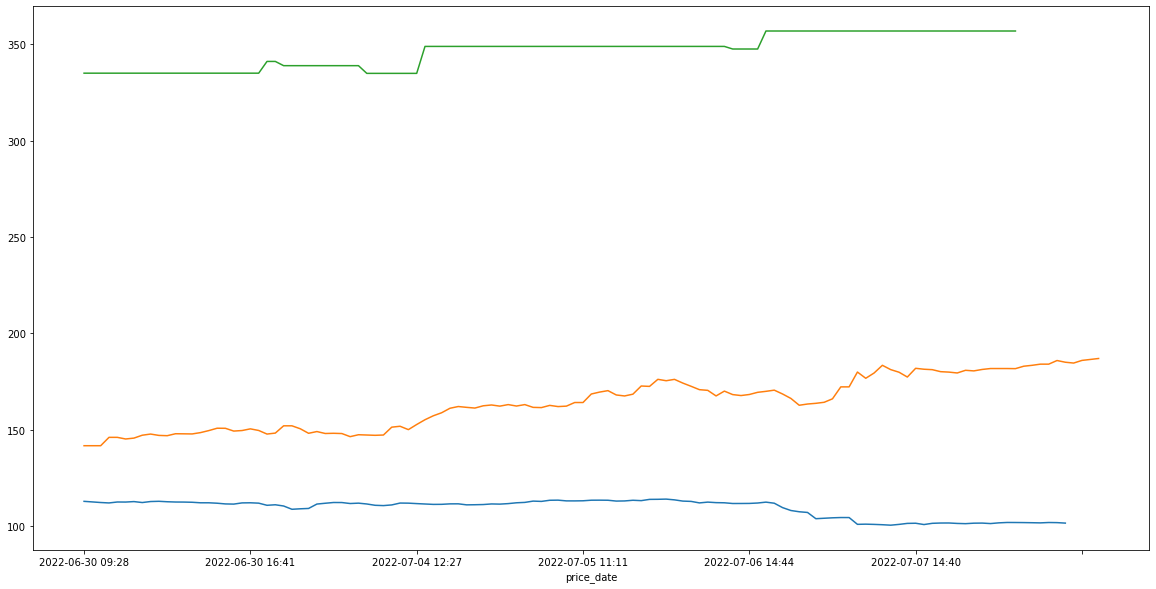

In [70]:
start_time = '2022-06-30 00:00'
end_time = '2022-07-07 24:00'
brent_aug = df_brent_barchart_aug["price_last"]
ttf_aug = df_ttf_barchart_aug["price_last"]
api2_aug = df_api2_barchart_aug["price_last"]
brent_aug = brent_aug.loc[start_time:end_time]
ttf_aug = ttf_aug.loc[start_time:end_time]
api2_aug = api2_aug.loc[start_time:end_time]
brent_aug.plot(figsize=(20,10))
ttf_aug.plot(figsize=(20,10))
api2_aug.plot(figsize=(20,10))
plt.show()

In [5]:
import sqlite3
db = Database('emtia_db.db')
conn = sqlite3.connect('emtia_db.db') 
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM brent_petrol
                               ''', conn)

sql_query_ttf = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM ttf_gas
                               ''', conn)

df = pd.DataFrame(sql_query, columns = ['id', 'name', 'price_last','price_chg','price_open','price_high','price_low','price_date','source']) 
df2 = pd.DataFrame(sql_query_ttf, columns = ['id', 'name', 'price_last','price_chg','price_open','price_high','price_low','price_date','source']) 
df2["price_date"]=pd.to_datetime(df2["price_date"])
df2["price_date"] = df2["price_date"].dt.strftime('%Y-%m-%d %H:%M')
df2.index = df2["price_date"]
df2.sort_index(inplace=True, ascending=True)
df2 = df2.drop(["id","price_date"],axis=1)

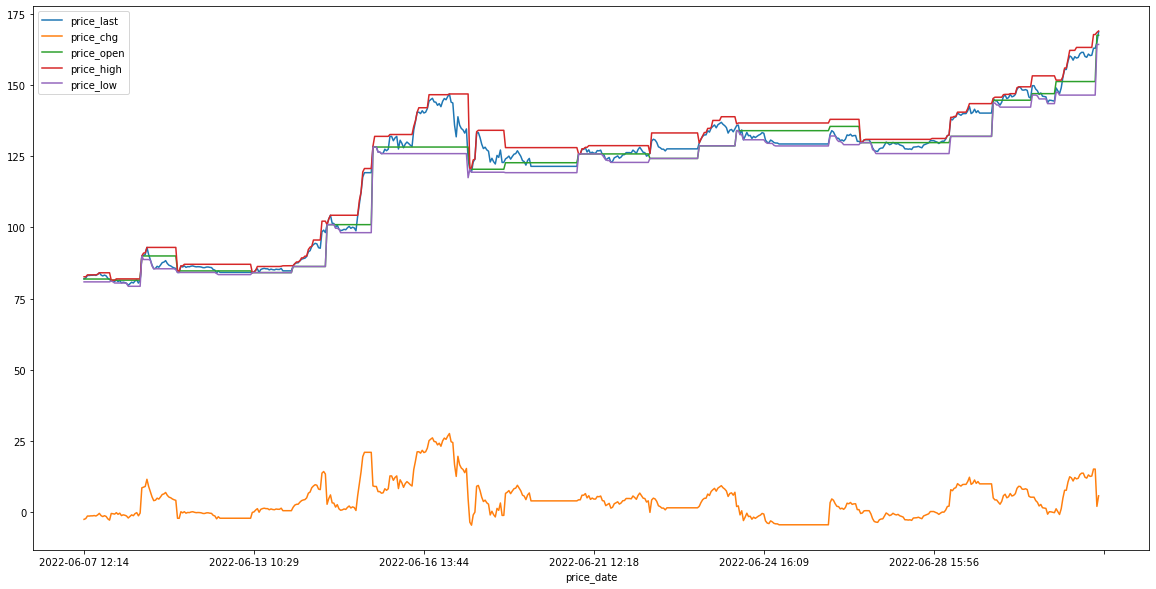

In [8]:
start_time = '2022-06-09 00:00'
end_time = '2022-06-09 24:00'
item_check = "price_last"
df2_aug = df2[df2["name"]=="Dutch TTF Gas Aug '22"].copy()
df2_aug.plot(figsize=(20,10))
plt.show()

# BARCHART.COM

In [2]:
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--incognito')
chrome_options.add_argument(
    "user-agent=Mozilla/5.0 (X11; Ubuntu; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2919.83 Safari/537.36")
products_all = []

this_year = (date.today()).strftime("%y")
next_year = (date.today() + timedelta(days=365)).strftime("%y")
year_after_next = (date.today() + timedelta(days=730)).strftime("%y")
next_month = (date.today() + timedelta(days=30)).strftime('%b')

products = {"Jan": "QAF",
            "Feb": "QAG",
            "Mar": "QAH",
            "Apr": "QAJ",
            "May": "QAK",
            "Jun": "QAM",
            "Jul": "QAN",
            "Aug": "QAQ",
            "Sep": "QAU",
            "Oct": "QAV",
            "Nov": "QAX",
            "Dec": "QAZ"}

start = date.today().month
left = 13 - start + 1
count = 0
months = []

start = date.today().month + 1
start_month = date.today() + timedelta(days=30)
print(start)
left = 13 - start
count = 0
months = []
while count < left:
    days_add = 30 * count
    month = (start_month + timedelta(days=days_add)).strftime("%b")
    print(month)
    products_all.append(str(products.get(month)) + str(this_year))
    count += 1

products = {"Jan": "QAF",
            "Feb": "QAG",
            "Mar": "QAH",
            "Apr": "QAJ",
            "May": "QAK",
            "Jun": "QAM",
            "Jul": "QAN",
            "Aug": "QAQ",
            "Sep": "QAU",
            "Oct": "QAV",
            "Nov": "QAX",
            "Dec": "QAZ"}
for key, value in products.items():
    products_all.append(str(products.get(key)) + str(next_year))
print(products_all)

TURN = 0
while TURN < 200:
    try:
        start_time = time.time()
        for item in products_all:
            url = f"https://www.barchart.com/futures/quotes/{item}/overview"
            print(url)
            driver = webdriver.Chrome(options=chrome_options)
            driver.get(url)

            phigh = driver.find_element(by=By.CSS_SELECTOR,
                                        value='#main-content-column > div > div.bc-quote-overview.row.ng-scope > div.small-12.large-5.column > div.bc-quote-row-chart > div.row > div.small-6.column.text-right > div:nth-child(3)')
                                                #main-content-column > div > div.bc-quote-overview.row.ng-scope > div.small-12.large-5.column > div.bc-quote-row-chart > div.row > div.small-6.column.text-right > div:nth-child(3)
            plow = driver.find_element(by=By.CSS_SELECTOR,
                                       value='#main-content-column > div > div.bc-quote-overview.row.ng-scope > div.small-12.large-5.column > div.bc-quote-row-chart > div.row > div:nth-child(1) > div:nth-child(3)')
            pname = driver.find_element(by=By.CSS_SELECTOR,
                                        value='#main-content-column > div > div.page-title.symbol-header-info.ng-scope > div.symbol-name > h1 > span.symbol')
            plast = driver.find_element(by=By.CSS_SELECTOR,
                                        value='#main-content-column > div > div.page-title.symbol-header-info.ng-scope > div:nth-child(2) > span.last-change.ng-binding')
            try:
                popen = driver.find_element(by=By.CSS_SELECTOR,
                                            value='#main-content-column > div > div.bc-quote-overview.row.ng-scope > div.small-12.large-5.column > div.bc-quote-row-chart > div.row-chart.ng-isolate-scope.marking > div.mark.ng-scope > span')
                price_open = float(popen.get_attribute("innerText").split(" ")[1])
            except NoSuchElementException:
                try:
                    popen = driver.find_element(by=By.CSS_SELECTOR,
                                                value='#main-content-column > div > div.bc-quote-overview.row.ng-scope > div.small-12.large-5.column > div.bc-quote-row-chart > div.row-chart.ng-isolate-scope > div.mark.ng-scope > span')
                    try:
                        price_open = float(popen.get_attribute("innerText").split(" ")[1])
                    except:
                        price_open = ""
                except NoSuchElementException:
                    price_open = ""

            try:
                pchg = driver.find_element(by=By.CSS_SELECTOR,
                                           value='#main-content-column > div > div.page-title.symbol-header-info.ng-scope > div:nth-child(2) > span.down > span.last-change.ng-binding')
            except NoSuchElementException:
                pchg = driver.find_element(by=By.CSS_SELECTOR,
                                           value='#main-content-column > div > div.page-title.symbol-header-info.ng-scope > div:nth-child(2) > span.up > span.last-change.ng-binding')

            price_name = pname.get_attribute("innerText")
            try:
                price_last = float(plast.get_attribute("innerText").split(" ")[0])
            except ValueError:
                price_last = float(plast.get_attribute("innerText").split(" ")[0].split('s')[0])
            price_chg = float(pchg.get_attribute("innerText"))
            price_high = float(phigh.get_attribute("innerText"))
            price_low = float(plow.get_attribute("innerText"))

            print(
                f"PRODUCT:{price_name}\nPrice Last: {price_last}\nPrice Change: {price_chg}\nPrice Open: {price_open}\nPrice High: {price_high}\nPrie Low: {price_low}")
            print("Data recorded to database!")
            driver.quit()
        TURN += 1
        final_time = (time.time() - start_time) / 60
        print("Runtime:--- %s minutes ---" % final_time)
    except:
        print("ERROR!! bp barchart")

10
Oct
Nov
Dec
['QAV', 'QAX22', 'QAZ22', 'QAF23', 'QAG23', 'QAH23', 'QAJ23', 'QAK23', 'QAM23', 'QAN23', 'QAQ23', 'QAU23', 'QAV23', 'QAX23', 'QAZ23']
https://www.barchart.com/futures/quotes/QAV/overview


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#main-content-column > div > div.bc-quote-overview.row.ng-scope > div.small-12.large-5.column > div.bc-quote-row-chart > div.row > div.small-6.column.text-right > div:nth-child(3)"}
  (Session info: headless chrome=105.0.5195.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x010A78B3+2193587]
	Ordinal0 [0x01040681+1771137]
	Ordinal0 [0x00F541A8+803240]
	Ordinal0 [0x00F824A0+992416]
	Ordinal0 [0x00F8273B+993083]
	Ordinal0 [0x00FAF7C2+1177538]
	Ordinal0 [0x00F9D7F4+1103860]
	Ordinal0 [0x00FADAE2+1170146]
	Ordinal0 [0x00F9D5C6+1103302]
	Ordinal0 [0x00F777E0+948192]
	Ordinal0 [0x00F786E6+952038]
	GetHandleVerifier [0x01350CB2+2738370]
	GetHandleVerifier [0x013421B8+2678216]
	GetHandleVerifier [0x011317AA+512954]
	GetHandleVerifier [0x01130856+509030]
	Ordinal0 [0x0104743B+1799227]
	Ordinal0 [0x0104BB68+1817448]
	Ordinal0 [0x0104BC55+1817685]
	Ordinal0 [0x01055230+1856048]
	BaseThreadInitThunk [0x7546FA29+25]
	RtlGetAppContainerNamedObjectPath [0x775E7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x775E7A6E+238]


# ICE

In [10]:
db = Database('emtia_db.db')
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--incognito')
chrome_options.add_argument( "user-agent=Mozilla/5.0 (X11; Ubuntu; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2919.83 Safari/537.36")
url_ice = f"https://www.theice.com/products/219/Brent-Crude-Futures/data"
driver_ice = webdriver.Chrome(options = chrome_options)
driver_ice.get(url_ice)
time.sleep(5)
start = date.today().month+1
start_month = date.today()+timedelta(days=30)
print(start)
left= 13-start
print(left)
rng = left+12
for i in range(1,rng):
    try:
        item = driver_ice.find_element(by = By.XPATH,value = f'/html/body/div[1]/div/div[1]/div[2]/div[3]/div/div/div[4]/div/div/div[1]/table/tbody[{i}]/tr/td[1]')
        last = driver_ice.find_element(by = By.XPATH,value = f'/html/body/div[1]/div/div[1]/div[2]/div[3]/div/div/div[4]/div/div/div[1]/table/tbody[{i}]/tr/td[2]')
        change = driver_ice.find_element(by = By.XPATH,value = f'/html/body/div[1]/div/div[1]/div[2]/div[3]/div/div/div[4]/div/div/div[1]/table/tbody[{i}]/tr/td[4]')
        brent_prd = item.get_attribute("innerText")
        try:
            brent_lst = float(last.get_attribute("innerText"))
        except ValueError:
            brent_lst = ""
        try:
            brent_chg = float(change.get_attribute("innerText"))
        except ValueError:
            brent_chg = ""
        print(f"PRODUCT:{brent_prd}\nPrice Last: {brent_lst}\nPrice Change: {brent_chg}")
        db.insert_brent(str("ice_"+str(brent_prd)),brent_lst,brent_chg,"","","",datetime.now(),url_ice)
        time.sleep(0.02)
    except AttributeError:
        continue

9
4
PRODUCT: OCT22
Price Last: 100.32
Price Change: 0.1
PRODUCT: NOV22
Price Last: 99.43
Price Change: 0.262
PRODUCT: DEC22
Price Last: 98.27
Price Change: 0.276
PRODUCT: JAN23
Price Last: 97.16
Price Change: 0.299
PRODUCT: FEB23
Price Last: 96.07
Price Change: 0.292
PRODUCT: MAR23
Price Last: 95.06
Price Change: 0.274
PRODUCT: APR23
Price Last: 94.16
Price Change: 0.256
PRODUCT: MAY23
Price Last: 93.35
Price Change: 0.247
PRODUCT: JUN23
Price Last: 92.6
Price Change: 0.238
PRODUCT: JUL23
Price Last: 
Price Change: 0.0
PRODUCT: AUG23
Price Last: 
Price Change: 0.0
PRODUCT: SEP23
Price Last: 
Price Change: 0.0
PRODUCT: OCT23
Price Last: 
Price Change: 0.0
PRODUCT: NOV23
Price Last: 
Price Change: 0.0
PRODUCT: DEC23
Price Last: 88.89
Price Change: 0.248


In [9]:
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--incognito')
chrome_options.add_argument( "user-agent=Mozilla/5.0 (X11; Ubuntu; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2919.83 Safari/537.36")
url_ice = f"https://www.theice.com/products/219/Brent-Crude-Futures/data"
driver_ice = webdriver.Chrome(options = chrome_options)
driver_ice.get(url_ice)
time.sleep(5)
item = driver_ice.find_element(by = By.XPATH,value = f'/html/body/div[1]/div/div[1]/div[2]/div[3]/div/div/div[4]/div/div/div[1]/table/tbody[1]/tr/td[1]')
print(item.get_attribute("innerText"))

 OCT22
